In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# ✅ Load the Stable Diffusion 2.1 model
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Enter your prompt: Dragon


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Image saved at: generated_image.png


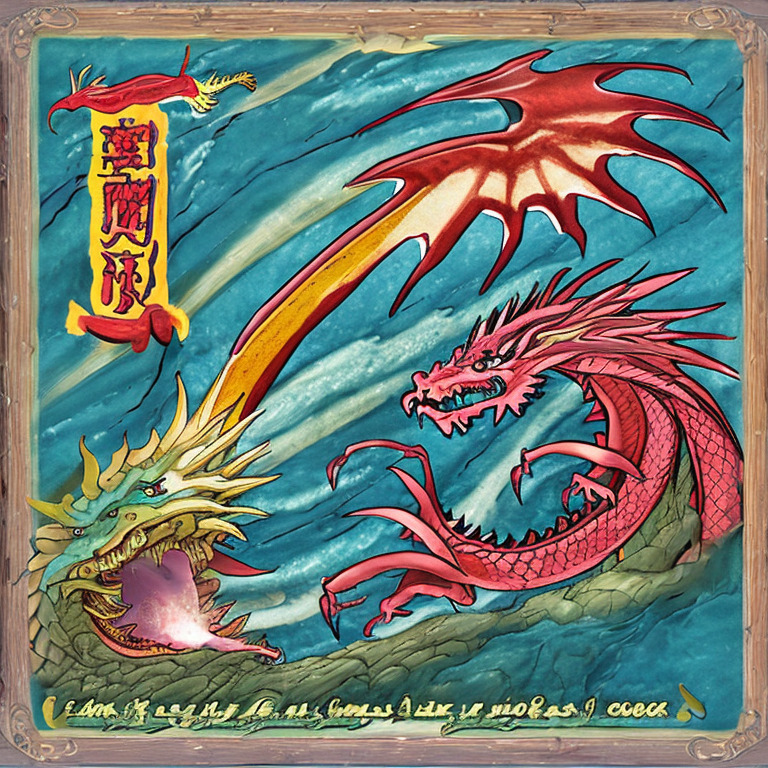

In [ ]:
def generate_sd_image(prompt, num_steps=80, guidance=10, save_path="generated_image.png"):
    """Generates an image from text using Stable Diffusion 2.1."""
    image = pipe(
        prompt=prompt,
        num_inference_steps=num_steps,
        guidance_scale=guidance
    ).images[0]

    image.save(save_path)
    print(f"✅ Image saved at: {save_path}")
    return image

# Example Usage
user_prompt = input("Enter your prompt: ")
generate_sd_image(user_prompt)

In [ ]:
# ✅ Load the Stable Diffusion 2.1 model
model_name = "stabilityai/stable-diffusion-2-1"
save_directory = "saved_model"  # Change this to your desired path

pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16
)

# ✅ Save the model locally
pipe.save_pretrained(save_directory)
print(f"✅ Model saved at: {save_directory}")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model saved at: saved_model


In [ ]:
!pip install flask flask-cors pyngrok
from pyngrok import ngrok
import os
import torch
from flask import Flask, request, send_file, jsonify
from diffusers import StableDiffusionPipeline

# ✅ Initialize Flask App
app = Flask(__name__)

# ✅ Define Model Path
MODEL_DIR = "saved_model"
OUTPUT_IMAGE = "generated_image.png"

# ✅ Load Model from Disk
if os.path.exists(MODEL_DIR):
    print("🔄 Loading model from local storage...")
    pipe = StableDiffusionPipeline.from_pretrained(
        MODEL_DIR, torch_dtype=torch.float16
    ).to("cuda")
    print("✅ Model loaded successfully!")
else:
    raise FileNotFoundError("❌ Model not found! Please save the model first.")

# ✅ Image Generation Function
def generate_sd_image(prompt, num_steps=50, guidance=7.5):
    """Generates an image from text and saves it."""
    image = pipe(
        prompt=prompt,
        num_inference_steps=num_steps,
        guidance_scale=guidance
    ).images[0]

    image.save(OUTPUT_IMAGE)
    return OUTPUT_IMAGE

# ✅ API Endpoint to Generate Image
@app.route('/generate', methods=['POST'])
def generate():
    """API Endpoint to generate an image from text prompt."""
    data = request.json
    prompt = data.get("prompt", "")

    if not prompt:
        return jsonify({"error": "❌ No prompt provided!"}), 400

    try:
        image_path = generate_sd_image(prompt)
        return send_file(image_path, mimetype='image/png')
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Start Flask Server
# Set your ngrok authtoken
ngrok.set_auth_token("2ugTcYqng6mIaEx2DrlvTWyJNyP_3B4khkEohRt68d13AVYZ5") # Replace YOUR_AUTHTOKEN with your actual authtoken

public_url = ngrok.connect(5000).public_url
print(f"🚀 Public API URL: {public_url}")

app.run(port=5000)


🔄 Loading model from local storage...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model loaded successfully!
🚀 Public API URL: https://a592-34-125-216-230.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Mar/2025 19:01:36] "GET /generate HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [22/Mar/2025 19:02:17] "GET /generate HTTP/1.1" 405 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [22/Mar/2025 19:02:45] "POST /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [22/Mar/2025 19:03:38] "POST /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [22/Mar/2025 19:04:41] "POST /generate HTTP/1.1" 200 -


In [ ]:
import shutil

folder_path = "/content/saved_model"  # Change to your folder path
shutil.make_archive("saved_model", 'zip', folder_path)


'/content/saved_model.zip'

In [ ]:
from google.colab import files

files.download("saved_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/saved_model /content/drive/MyDrive/


ValueError: mount failed